In [78]:
import itertools
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import statsmodels.api as sm

In [ ]:
# File created: Jan. 5 2019
# Tutorial Reference
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [2]:
# Dataset:
# Consumer Price Index for All Urban Consumers: All Items
# Citation:
# U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], 
# retrieved from FRED, Federal Reserve Bank of St. Louis;
# https://fred.stlouisfed.org/series/CPIAUCSL, January 4, 2019.

In [158]:
df = pd.read_csv("./data/CPIAUCSL.csv", index_col=0, parse_dates=True)
# df["DATE"] = pd.to_datetime(df["DATE"])
df.columns = ["CPI"]
print(df.dtypes)
df.head()
# month_df = df.resample("M").mean().head()

CPI    float64
dtype: object


,CPI
DATE,
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
1947-06-01,22.08


In [159]:
# 1st order differencing.
d1 = df.diff()
d1.dropna(inplace=True)
d1.head()

,CPI
DATE,
1947-03-01,0.38
1947-04-01,0.00
1947-05-01,-0.05
1947-06-01,0.13
1947-07-01,0.15


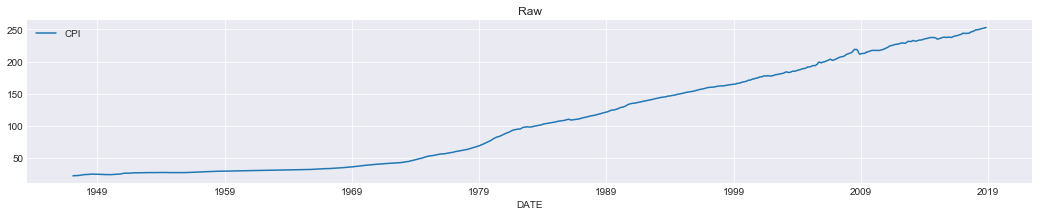

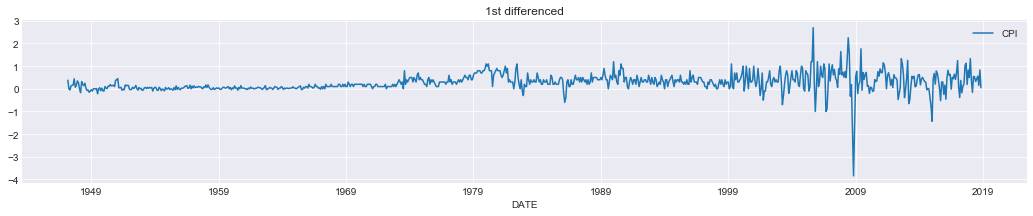

In [160]:
df.plot(figsize=(18, 3), grid=True)
plt.title("Raw")
plt.show()
d1.plot(figsize=(18, 3), grid=True)
plt.title("1st differenced")
plt.show()

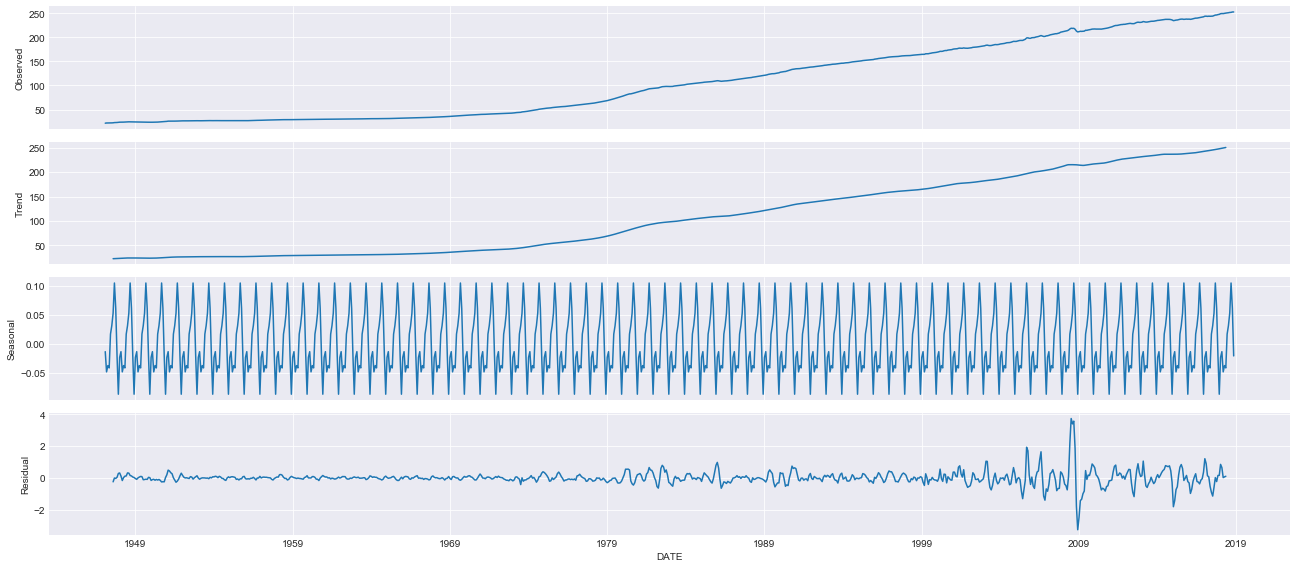

In [161]:
from pylab import rcParams
rcParams["figure.figsize"] = (18, 8)
rcParams["axes.grid"] = True
decomposition = sm.tsa.seasonal_decompose(df, model="additive")
fig = decomposition.plot()
plt.show()

In [162]:
# Grid Searching for Parameters

In [163]:
# Fitting ARIMA
model = sm.tsa.statespace.SARIMAX(
    df,
    order=(1,1,1),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [164]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                CPI   No. Observations:                  862
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -435.774
Date:                            Sat, 05 Jan 2019   AIC                            879.548
Time:                                    02:36:01   BIC                            898.463
Sample:                                02-01-1947   HQIC                           886.799
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1321      0.051      2.600      0.009       0.032       0.232
ma.L1          0.3768      0.043   

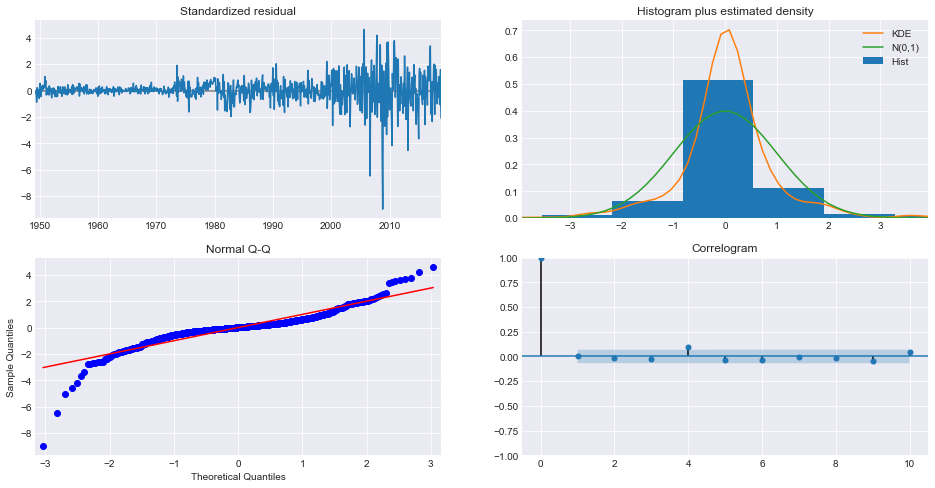

In [165]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [166]:
pred = results.get_prediction(start=pd.to_datetime("2000-01-01"), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.columns

Index(['lower CPI', 'upper CPI'], dtype='object')

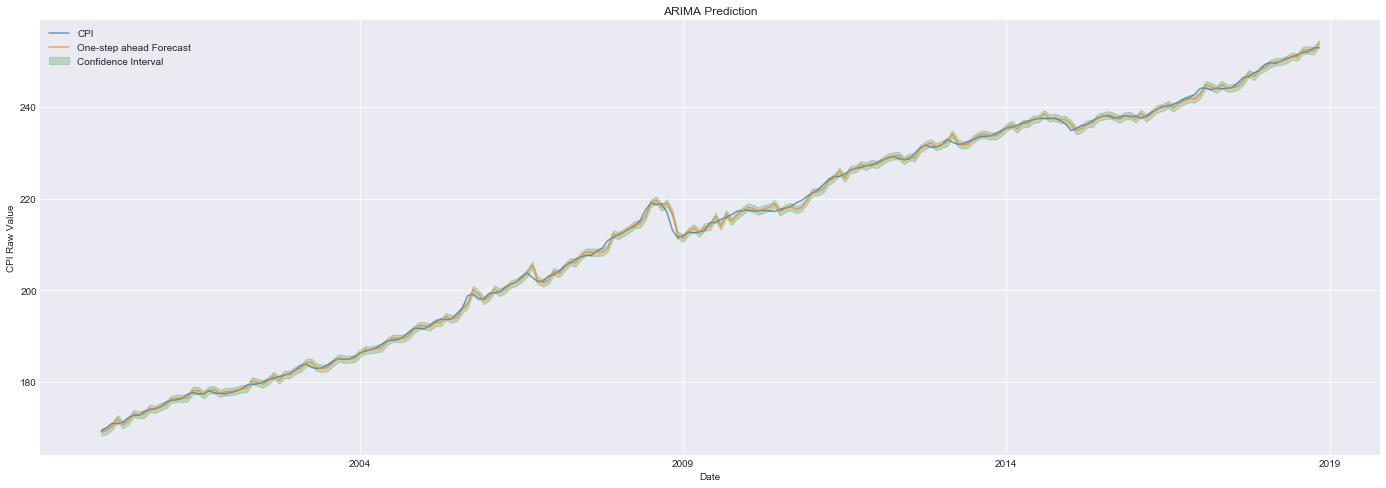

In [167]:
rcParams["figure.figsize"] = (24, 8)
ax = df[pd.to_datetime("2000-01-01"):].plot(label="observed", alpha=.7)
pred.predicted_mean.plot(ax=ax, label="One-step ahead Forecast", alpha=.7)
ax.fill_between(
    pred_ci.index,
    pred_ci["lower CPI"],
    pred_ci["upper CPI"],
    color="green",
    alpha=.2,
    label="Confidence Interval"
)
ax.set_xlabel("Date")
ax.set_ylabel("CPI Raw Value")
plt.title("ARIMA Prediction")
plt.legend()
plt.show()

In [168]:
list(itertools.product([1,2], [1,2]))

[(1, 1), (1, 2), (2, 1), (2, 2)]